## Install

In [1]:
# univariate analysis
!pip install ydata-profiling
# local time
!pip install pandas pytz
!pip install pandas pycountry

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5460e8f3c0c99a3863ca4f3d1430e9afb9679d00b462309d4d23f77bc7e68e8d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.1 MB/s eta 0:00:00


## 0.Load Data

In [2]:
# connect Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# load data
import pandas as pd
eve=pd.read_csv('/content/drive/MyDrive/DA_course1/Final project/events1.csv')
itm=pd.read_csv('/content/drive/MyDrive/DA_course1/Final project/items.csv')
usr=pd.read_csv('/content/drive/MyDrive/DA_course1/Final project/users.csv')

In [4]:
# merge data
comp_data = (
    eve
    .merge(itm, left_on='item_id', right_on='id', how='outer')
    .merge(usr, left_on='user_id', right_on='id', how='inner')
)

## Bước 1: Thực hiện Data Dictionary & Data Quality Assessment

### About data

In [5]:
# values/keys of columns
for column in comp_data.columns:
    unique = comp_data[column].unique()
    print(f"Unique value of {column}: {unique}")

Unique value of user_id: [  5115  10904  29457 ... 260725  18261   3772]
Unique value of ga_session_id: [17001 16401 17113 ... 18001 17969 17918]
Unique value of country: ['US' 'TR' 'KR' 'MT' 'ES' 'MX' 'IL' nan 'IN' 'CA' 'GB' 'PL' 'MY' 'QA' 'TW'
 'GR' 'ID' 'RU' 'DE' 'PE' 'FR' 'PK' 'EG' 'JP' 'BD' 'SE' 'HN' 'RS' 'UY'
 'NL' 'IT' 'SG' 'CN' 'HK' 'IE' 'CO' 'TH' 'HR' 'BR' 'AU' 'LK' 'PT' 'CZ'
 'CY' 'AT' 'BA' 'DK' 'RO' 'DZ' 'SA' 'NZ' 'UA' 'NG' 'SK' 'BY' 'BG' 'VN'
 'CH' 'PH' 'SI' 'AR' 'MA' 'GT' 'IQ' 'NO' 'KZ' 'SV' 'LV' 'CL' 'PR' 'BE'
 'PS' 'FI' 'AE' 'DO' 'KW' 'LU' 'GH' 'LT' 'EC' 'GE' 'AM' 'JO' 'XK' 'MK'
 'PY' 'ZA' 'IS' 'MN' 'TN' 'AZ' 'HU' 'KH' 'CR' 'VE' 'TT' 'BO' 'PA' 'EE'
 'AL' 'JM' 'BS' 'NP' 'MO' 'LB' 'BH' 'MM' 'KE' 'OM']
Unique value of device: ['mobile' 'desktop' 'tablet']
Unique value of type: ['purchase' 'add_to_cart' 'begin_checkout']
Unique value of item_id: [   0    1    2 ... 1378 1379 1380]
Unique value of date_x: ['2020-11-02 12:05:14' '2020-11-03 08:19:14' '2020-11-05 18:02:19' ...


In [6]:
# data info
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        758884 non-null  int64 
 1   ga_session_id  758884 non-null  int64 
 2   country        754329 non-null  object
 3   device         758884 non-null  object
 4   type           758884 non-null  object
 5   item_id        758884 non-null  int64 
 6   date_x         758884 non-null  object
 7   id_x           758884 non-null  int64 
 8   name           758884 non-null  object
 9   brand          758884 non-null  object
 10  variant        122624 non-null  object
 11  category       758884 non-null  object
 12  price_in_usd   758884 non-null  int64 
 13  id_y           758884 non-null  int64 
 14  ltv            758884 non-null  int64 
 15  date_y         758884 non-null  object
dtypes: int64(7), object(9)
memory usage: 92.6+ MB


### Check duplicate values

In [7]:
dup = comp_data[comp_data.duplicated()]
dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39498 entries, 28 to 754587
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        39498 non-null  int64 
 1   ga_session_id  39498 non-null  int64 
 2   country        39234 non-null  object
 3   device         39498 non-null  object
 4   type           39498 non-null  object
 5   item_id        39498 non-null  int64 
 6   date_x         39498 non-null  object
 7   id_x           39498 non-null  int64 
 8   name           39498 non-null  object
 9   brand          39498 non-null  object
 10  variant        38341 non-null  object
 11  category       39498 non-null  object
 12  price_in_usd   39498 non-null  int64 
 13  id_y           39498 non-null  int64 
 14  ltv            39498 non-null  int64 
 15  date_y         39498 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.1+ MB


In [8]:
# drop duplicates
test = comp_data.drop_duplicates()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719386 entries, 0 to 758883
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        719386 non-null  int64 
 1   ga_session_id  719386 non-null  int64 
 2   country        715095 non-null  object
 3   device         719386 non-null  object
 4   type           719386 non-null  object
 5   item_id        719386 non-null  int64 
 6   date_x         719386 non-null  object
 7   id_x           719386 non-null  int64 
 8   name           719386 non-null  object
 9   brand          719386 non-null  object
 10  variant        84283 non-null   object
 11  category       719386 non-null  object
 12  price_in_usd   719386 non-null  int64 
 13  id_y           719386 non-null  int64 
 14  ltv            719386 non-null  int64 
 15  date_y         719386 non-null  object
dtypes: int64(7), object(9)
memory usage: 93.3+ MB


### Missing Values

In [9]:
print(test.isna().sum())

user_id               0
ga_session_id         0
country            4291
device                0
type                  0
item_id               0
date_x                0
id_x                  0
name                  0
brand                 0
variant          635103
category              0
price_in_usd          0
id_y                  0
ltv                   0
date_y                0
dtype: int64


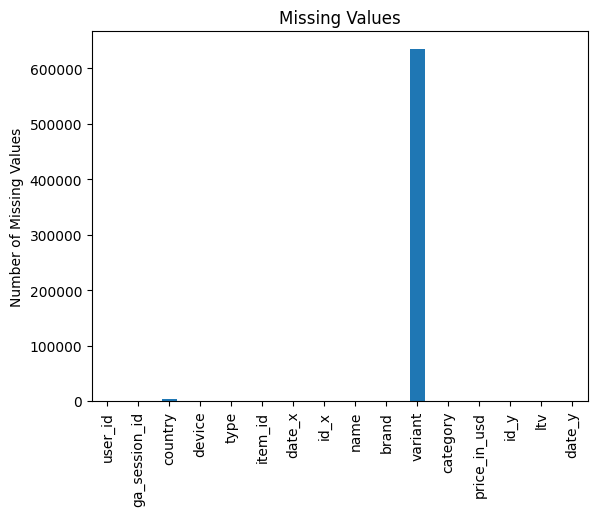

In [10]:
import matplotlib.pyplot as plt

test.isna().sum().plot(kind='bar')
plt.title('Missing Values')
plt.ylabel('Number of Missing Values')
plt.show()

user_id           0.000000
ga_session_id     0.000000
country           0.596481
device            0.000000
type              0.000000
item_id           0.000000
date_x            0.000000
id_x              0.000000
name              0.000000
brand             0.000000
variant          88.284037
category          0.000000
price_in_usd      0.000000
id_y              0.000000
ltv               0.000000
date_y            0.000000
dtype: float64


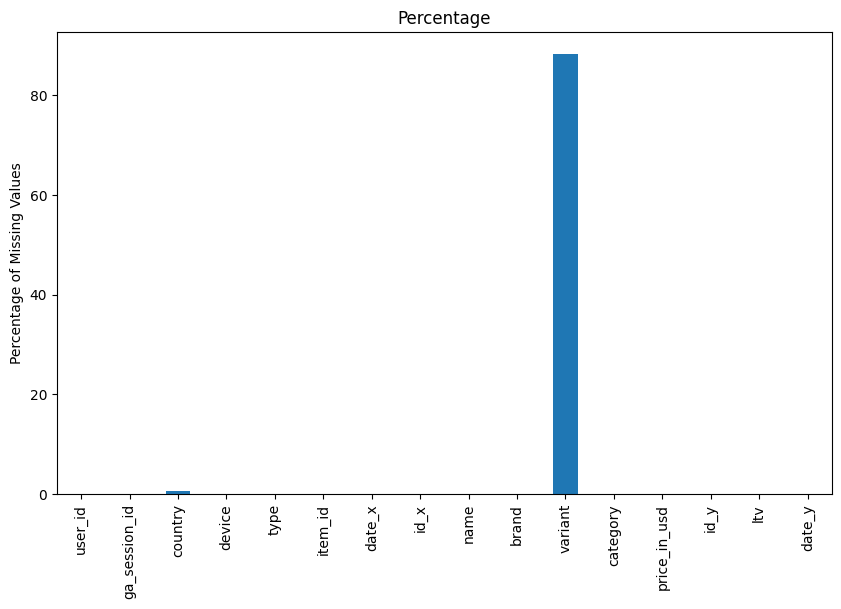

In [11]:
missing_percentage = (test.isnull().sum() / len(test)) * 100
print(missing_percentage)
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage')
plt.ylabel('Percentage of Missing Values')
plt.show()

- Missing value of "country": 0.6% (missing value < 4-5% có thể loại bỏ các hàng)
- Missing value of "variant": 88.3% (missing value > 60% có thẻ loại bỏ cột/biến)

In [12]:
# data quality assessment
test.describe()

,user_id,ga_session_id,item_id,id_x,price_in_usd,id_y,ltv
count,719386.000000,719386.000000,719386.000000,719386.000000,719386.000000,719386.000000,719386.000000
mean,30215.532934,3609.655549,920.030530,920.030530,25.043379,30215.532934,59.025124
std,56350.644850,3916.364635,250.526773,250.526773,20.941856,56350.644850,119.815095
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,8420.000000,624.000000,923.000000,923.000000,12.000000,8420.000000,0.000000
50%,17360.000000,2098.500000,975.000000,975.000000,22.000000,17360.000000,0.000000
75%,25914.000000,5350.000000,1042.000000,1042.000000,30.000000,25914.000000,76.000000
max,270145.000000,18033.000000,1380.000000,1380.000000,313.000000,270145.000000,1530.000000


In [13]:
test.nunique()

,0
user_id,14701
ga_session_id,18034
country,108
device,3
type,3
item_id,1381
date_x,78040
id_x,1381
name,421
brand,5


In [14]:
# đổi tên các columns
test = test.rename(columns={'date_x': 'date_session', 'name': 'item_name', 'date_y': 'user_create_date'})
# xóa những columns bị trùng lặp
test.drop(columns=['id_x'], inplace=True)
test.drop(columns=['id_y'], inplace=True)
test.columns

Index(['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id',
       'date_session', 'item_name', 'brand', 'variant', 'category',
       'price_in_usd', 'ltv', 'user_create_date'],
      dtype='object')

## Bước 2: Xử lí dữ liệu missing values

In [15]:
comp_data = test.copy()
# drop cột "variant" vì missing value > 60%
comp_data.drop(columns=['variant'], inplace=True)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719386 entries, 0 to 758883
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           719386 non-null  int64 
 1   ga_session_id     719386 non-null  int64 
 2   country           715095 non-null  object
 3   device            719386 non-null  object
 4   type              719386 non-null  object
 5   item_id           719386 non-null  int64 
 6   date_session      719386 non-null  object
 7   item_name         719386 non-null  object
 8   brand             719386 non-null  object
 9   variant           84283 non-null   object
 10  category          719386 non-null  object
 11  price_in_usd      719386 non-null  int64 
 12  ltv               719386 non-null  int64 
 13  user_create_date  719386 non-null  object
dtypes: int64(5), object(9)
memory usage: 82.3+ MB


In [17]:
# chỉ lấy các rows không bị missing value ở cột "country"
comp_data = comp_data[comp_data['country'].notnull()]
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715095 entries, 0 to 758883
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           715095 non-null  int64 
 1   ga_session_id     715095 non-null  int64 
 2   country           715095 non-null  object
 3   device            715095 non-null  object
 4   type              715095 non-null  object
 5   item_id           715095 non-null  int64 
 6   date_session      715095 non-null  object
 7   item_name         715095 non-null  object
 8   brand             715095 non-null  object
 9   category          715095 non-null  object
 10  price_in_usd      715095 non-null  int64 
 11  ltv               715095 non-null  int64 
 12  user_create_date  715095 non-null  object
dtypes: int64(5), object(8)
memory usage: 76.4+ MB


In [18]:
from datetime import datetime
import time
# đưa dữ liệu của cột "date_session" & "user_create_date" về định dạng datetime
comp_data['date_session'] = pd.to_datetime(comp_data['date_session'], format='%Y-%m-%d %H:%M:%S')
comp_data['user_create_date'] = pd.to_datetime(comp_data['user_create_date'], format='%Y-%m-%d %H:%M:%S')

# thêm 2 cột "hour_session" và "day_of_week"
comp_data['hour_session'] = comp_data['date_session'].dt.hour
comp_data['day_of_week'] = comp_data['date_session'].dt.day_name()
comp_data.head(10)

,user_id,ga_session_id,country,device,type,item_id,date_session,item_name,brand,category,price_in_usd,ltv,user_create_date,hour_session,day_of_week
0,5115,17001,US,mobile,purchase,0,2020-11-02 12:05:14,Google Land & Sea Cotton Cap,Google,Apparel,14,85,2020-11-02 11:53:43,12,Monday
1,10904,16401,TR,desktop,purchase,0,2020-11-03 08:19:14,Google Land & Sea Cotton Cap,Google,Apparel,14,40,2020-09-06 09:19:37,8,Tuesday
2,29457,17113,KR,mobile,purchase,0,2020-11-05 18:02:19,Google Land & Sea Cotton Cap,Google,Apparel,14,33,2020-11-05 17:51:34,18,Thursday
3,30148,16175,MT,desktop,purchase,0,2020-11-05 18:33:59,Google Land & Sea Cotton Cap,Google,Apparel,14,517,2020-09-27 21:00:27,18,Thursday
4,32087,15869,US,desktop,purchase,0,2020-11-06 03:39:46,Google Land & Sea Cotton Cap,Google,Apparel,14,55,2020-11-06 03:15:36,3,Friday
5,18184,16368,ES,desktop,purchase,0,2020-11-09 11:16:13,Google Land & Sea Cotton Cap,Google,Apparel,14,86,2020-09-18 18:30:01,11,Monday
6,2418,15838,US,mobile,purchase,0,2020-11-16 01:10:12,Google Land & Sea Cotton Cap,Google,Apparel,14,95,2020-11-16 00:36:18,1,Monday
7,2406,2748,MX,desktop,add_to_cart,0,2020-11-17 00:29:16,Google Land & Sea Cotton Cap,Google,Apparel,14,96,2020-10-01 08:02:17,0,Tuesday
8,2406,2748,MX,desktop,add_to_cart,0,2020-11-17 00:30:31,Google Land & Sea Cotton Cap,Google,Apparel,14,96,2020-10-01 08:02:17,0,Tuesday
9,2406,2748,MX,desktop,add_to_cart,0,2020-11-17 00:35:36,Google Land & Sea Cotton Cap,Google,Apparel,14,96,2020-10-01 08:02:17,0,Tuesday


In [19]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715095 entries, 0 to 758883
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           715095 non-null  int64         
 1   ga_session_id     715095 non-null  int64         
 2   country           715095 non-null  object        
 3   device            715095 non-null  object        
 4   type              715095 non-null  object        
 5   item_id           715095 non-null  int64         
 6   date_session      715095 non-null  datetime64[ns]
 7   item_name         715095 non-null  object        
 8   brand             715095 non-null  object        
 9   category          715095 non-null  object        
 10  price_in_usd      715095 non-null  int64         
 11  ltv               715095 non-null  int64         
 12  user_create_date  715095 non-null  datetime64[ns]
 13  hour_session      715095 non-null  int32         
 14  day_of_we

## Bước 3: Univariate - Bivariate - Multivariate Analysis

### Univariate: sử dụng profiling

In [20]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(comp_data, title="Pandas Profiling Report")
profile.to_file('/content/drive/MyDrive/DA_course1/Final project/univariate_profilling.html')
# profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5 3 7 ... 1 4 2]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

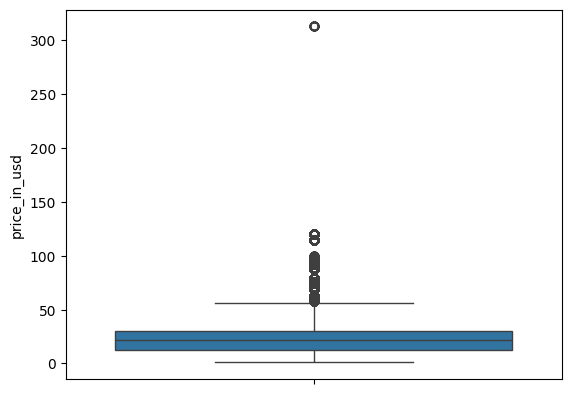

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
sns.boxplot(y=comp_data['price_in_usd'])
plt.show()

GTBT của "price_in_usd" nằm trong khoảng đâu đó từ 0 cho đến 60/70 covert được 99.7% là các GTBT

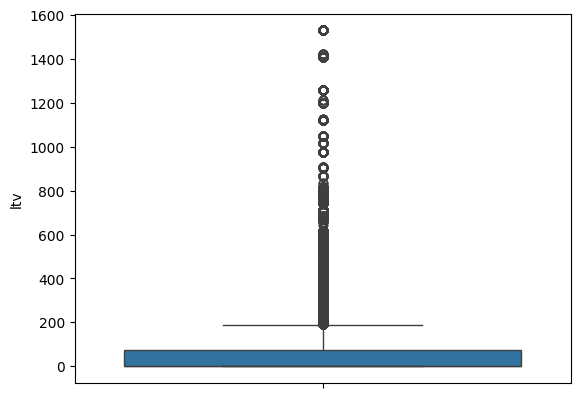

In [22]:
sns.boxplot(y=comp_data['ltv'])
plt.show()

GTBT của "ltv" từ 0 cho đến xung quanh 200

### Bivariate

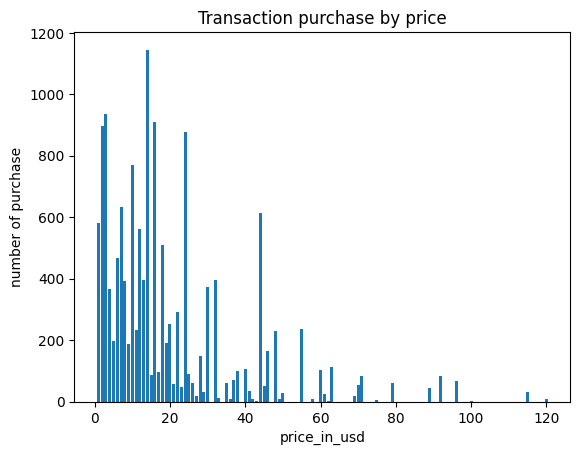

In [23]:
#data = comp_data['price_in_usd'].value_counts()
data = comp_data[comp_data['type'] == 'purchase']['price_in_usd'].value_counts()
plt.bar(data.index, data.values)
plt.xlabel("price_in_usd")
plt.ylabel("number of purchase")
plt.title("Transaction purchase by price")
plt.show()

**Nhận xét**
- Những items được mua nhiều nhất có giá dao động từ 0-30, 30-60, sau đó thì thưa dần và thấp nhất

**Đề xuất**
- Sản xuất những sản phẩm có giá trong khoảng từ 0-30, 30-60. Và chủ yếu nên tập trung vào phân khúc giá từ 0-30, còn giá 30-60 sẽ là những sản phẩm tiềm năng

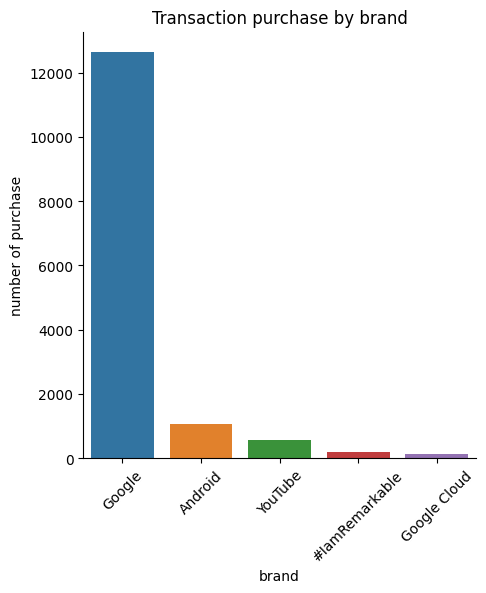

In [24]:
#sns.catplot(x = 'brand', kind = 'count', hue = 'brand', data = comp_data)
sns.catplot(x = 'brand', kind = 'count', hue = 'brand', data = comp_data[comp_data['type'] == 'purchase'])
plt.ylabel('number of purchase')
plt.title('Transaction purchase by brand')
plt.xticks(rotation=45)
plt.show()

**Nhận xét**
- Items thuộc brand Google được mua nhiều nhất. Brand Google có nhận dạng thương hiệu tốt nhất

**Đề xuất**
- Tung ra thị trường nhiều sản phẩm thuộc thương hiệu Google hơn
- Cải thiện khả năng nhận diện thương hiệu đối với các items thuộc Android và Youtube bằng các campaign quảng cáo

<ipython-input-25-30bdc01e7d8e>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-25-30bdc01e7d8e>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-25-30bdc01e7d8e>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


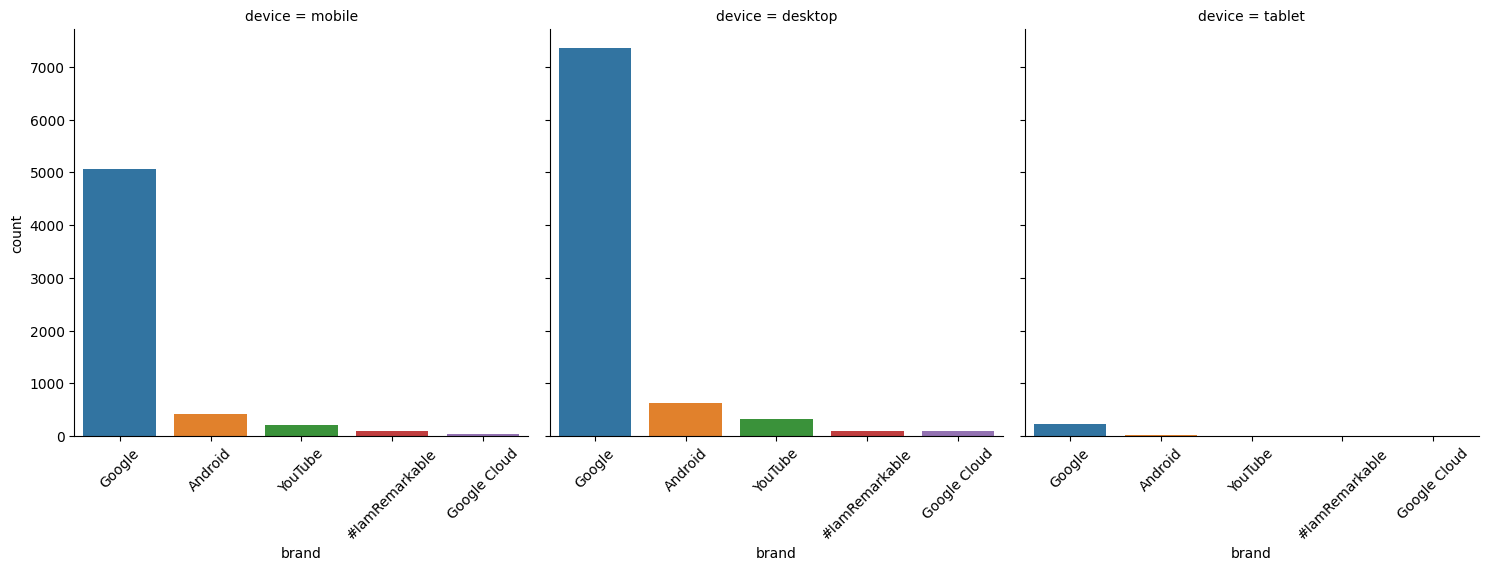

In [25]:
#g = sns.catplot(x = 'brand', kind = 'count', col = 'device', hue = 'brand', data = comp_data)
g = sns.catplot(x = 'brand', kind = 'count', col = 'device', hue = 'brand', data = comp_data[comp_data['type'] == 'purchase'])
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

**Nhận xét**
- Mặc dù trên các thiết bị khác nhau nhưng các items của brand Google vẫn được mua nhiều nhất, sau đó đến Android và Youtube. Không có sự biến đổi thứ tự so với thống kê chung ở trên
- Users sử dụng thiết bị desktop nhiều nhất, sau đó đến mobile cho nên việc users mua sản phẩm trên 2 thiết bị này theo những brand khác nhau vẫn đứng cao nhất và cao thứ hai vẫn giống so với thống kê chung

**Đề xuất**
- Chạy các campaign quảng cáo song song trên 2 nền tảng desktop và mobile. Mục đích là vừa để quảng cáo trực tiếp, vừa để quảng cáo chéo. Điều này có nghĩa là, ví dụ muốn tăng GMV đối với thiết bị mobile thì có thể chạy campaign quảng cáo kèm theo voucher được áp dụng trên mobile nhưng không được áp dụng trên desktop nên kích thích người mua tiêu dùng trên mobile

In [26]:
# Create a scatter plot using Plotly Express
import plotly.express as px
# fig = px.scatter(comp_data, x='ltv', y='price_in_usd',
#                  title='<b>Relationship between Lifetime Value and Price in USD</b>',
#                  trendline='ols')
fig = px.scatter(comp_data[comp_data['type'] == 'purchase'], x='ltv', y='price_in_usd',
                 title='<b>Relationship between Lifetime Value and Price in USD</b>',
                 trendline='ols')

fig.update_layout(
    xaxis_title='lifetime value',
    yaxis_title='price in usd',
    title_x=0.5
)

fig.show()


**Nhận xét:**
- 2 biến lifetime value và price in usd tỉ lệ thuận với nhau (nhưng chỉ là tuyến tính yếu). Tuy nhiên số lượng transaction giảm
- Lifetime value tập trung từ 0-400: giá trị người dùng tạo ra từ 0-400usd. price_in_usd được chi nhiều trong khoảng này là từ 0-30, từ 30-60

**Đề xuất:**
- Đưa ra những campaign thu hút nhiều khách hàng mới
- Có những chính sách chăm sóc, giữ chân khách hàng như là hạng thành viên đối với những users có ltv cao

#### Actions of users

             type  total_actions  percentage
0     add_to_cart         662094   92.588258
1  begin_checkout          38369    5.365581
2        purchase          14632    2.046162


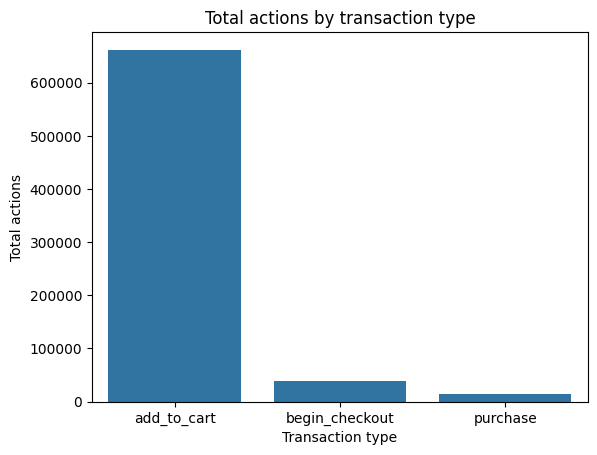

In [27]:
user_count_by_type = comp_data.groupby('type')['user_id'].count().reset_index()
user_count_by_type = user_count_by_type.rename(columns={'user_id': 'total_actions'})
user_count_by_type['percentage'] = user_count_by_type['total_actions'] *100/ user_count_by_type['total_actions'].sum()
print(user_count_by_type)

sns.barplot(x='type', y='total_actions', data=user_count_by_type)
plt.title('Total actions by transaction type')
plt.xlabel('Transaction type')
plt.ylabel('Total actions')
plt.show()


**Nhận xét**
- Type "add_to_cart" chiếm tỷ lệ cao nhất và cũng lớn nhất (92.59%) so với các type còn lại. Tuy nhiên type này không tạo ra GMV cho doanh nghiệp.
- Lí do:
  + Những sản phẩm này là những sản phẩm họ thích
  + Xem giá của sản phẩm có được ưu đãi gì không

**Đề xuất**
- Đưa ra chương trình ưu đãi phù hợp đối với những sản phẩm được add to cart nhiều (có thể tham khảo giá sản phẩm cùng loại của đối thủ cạnh tranh nếu có)
- Từ những sản phẩm mà khách hàng yêu thích có thể đề xuất thêm những sản phẩm cùng loại cho khách hàng

In [28]:
#vip users
purchase_data = comp_data[comp_data['type'] == 'purchase']
vip_users = purchase_data.groupby('user_id')['price_in_usd'].sum()
vip_users = vip_users.sort_values(ascending=False).reset_index()
print(vip_users.head())


   user_id  price_in_usd
0     7765          1410
1    11073           878
2    20451           857
3     1298           818
4    28943           781


**Đề xuất**
- Đối với những khách hàng này là những khách hàng chi nhiều tiền nhất để mua sản phẩm, nên cần có những chính sách chăm sóc khách hàng phù hợp
  + Áp dụng các hạng thành viên để tương ứng với những khách hàng thành viên có những chính sách ưu tiên riêng: kim cương, vàng, bạc, đồng để giữ chân khách hàng

In [29]:
# Items 'Add to Cart' but not purchase
add_to_cart_not_purchased = comp_data[
    (comp_data['type'] == 'add_to_cart') & (~comp_data['user_id'].isin(comp_data[comp_data['type'] == 'purchase']['user_id']))
]

add_to_cart_counts = add_to_cart_not_purchased.groupby('item_name')['user_id'].count().reset_index()
add_to_cart_counts = add_to_cart_counts.rename(columns={'user_id': 'quantity_add_to_cart'})
add_to_cart_counts = add_to_cart_counts.sort_values(by='quantity_add_to_cart',ascending=False).reset_index()

print(add_to_cart_counts[['item_name', 'quantity_add_to_cart']].head())

                         item_name  quantity_add_to_cart
0         Google Navy Speckled Tee                  7698
1            Google Zip Hoodie F/C                  7630
2           Super G Unisex Joggers                  6957
3       Google Women's Striped L/S                  6732
4  Google Campus Bike Eco Tee Navy                  6396


**Nhận xét**
- Đối với một số sản phẩm như: Google Zip Hoodie F/C được purchase nhiều nhất cũng là những sản phẩm được add to cart nhiều nhất

**Đề xuất**
- Giống như phần Total actions by transaction type

### Multivariate Analysis

#### Global

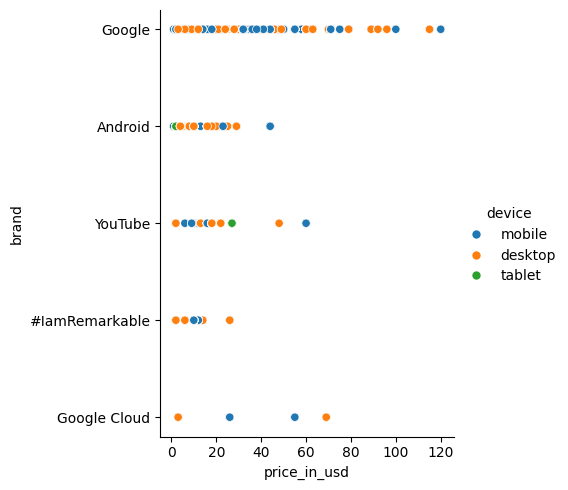

In [30]:
sns.relplot(x = 'price_in_usd', y= 'brand', hue = 'device', data = comp_data[comp_data['type'] == 'purchase'])
plt.show()

**Nhận xét:**
- Giá của items dao động từ 0-100
- Người dùng sử dụng mobile và desktop là nhiều nhất
- Họ mua hàng nhiều ở brand Google và Android

**Đề xuất:**
- Giữ giá của sản phẩm trong mức từ 0-100. Không nên bán sản phẩm với giá cao hơn
- Đảm bảo giao diện người dùng và tốc độ xử lý các session trên 2 thiết bị là mobile và desktop được tốt nhất
- Bán thêm những mặt hàng thuộc thương hiệu Google và Android

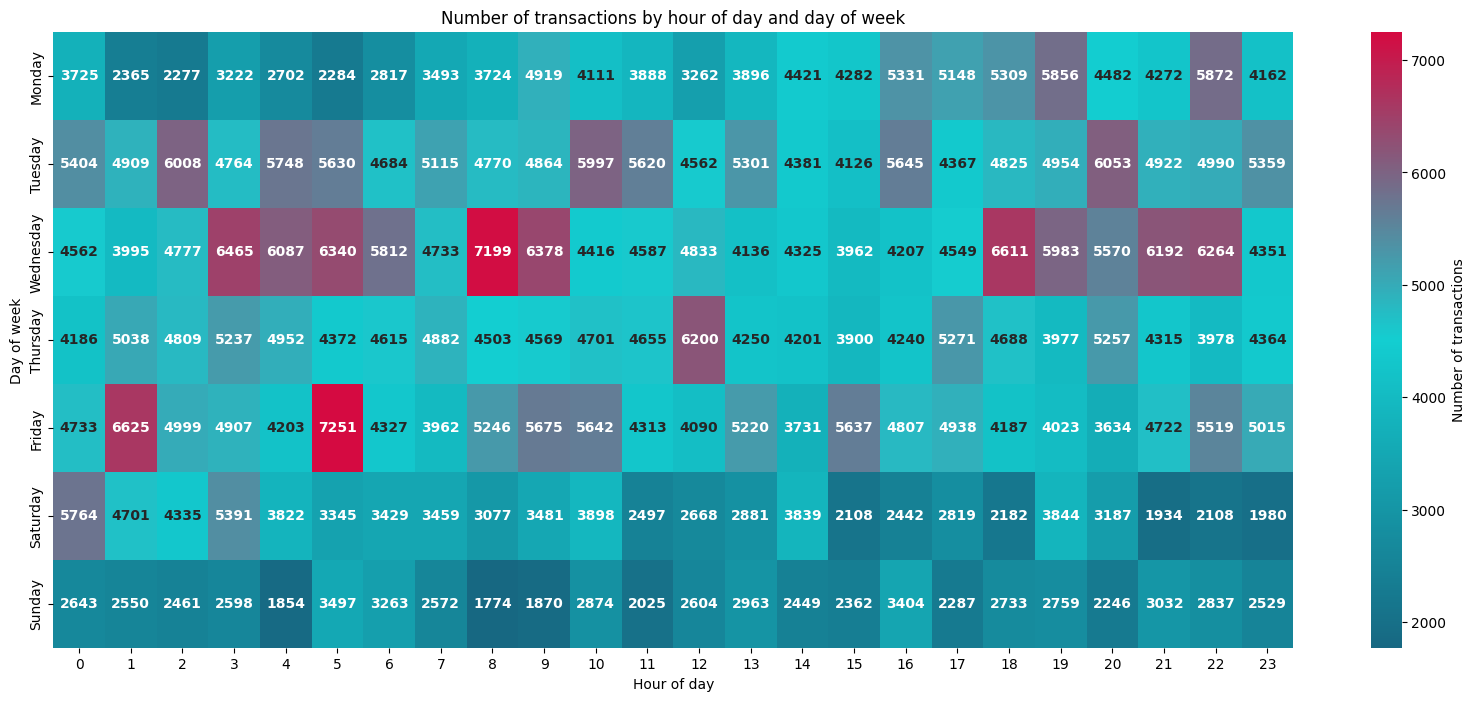

In [31]:
# Số lượng giao dịch theo giờ trong ngày và ngày trong tuần
# Tạo pivot table cho heatmap
heatmap_data = comp_data.pivot_table(values='price_in_usd', index='day_of_week', columns='hour_session', aggfunc='count', fill_value=0)

# Sắp xếp lại thứ tự của ngày trong tuần để hiển thị đúng
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

def integer_formatter(x, pos):
    return f'{int(x)}'

# Chỉnh màu
colors = ['#176882', '#13CED1', '#D50A41']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='', cbar_kws={'label': 'Number of transactions'}, annot_kws={"size": 10, "weight": "bold"})

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(FuncFormatter(integer_formatter))

plt.title('Number of transactions by hour of day and day of week')
plt.xlabel('Hour of day')
plt.ylabel('Day of week')

plt.show()

**Nhận xét:**
- Trong 3 tháng dữ liệu được thống kê thì users mua hàng nhiều nhất vào thứ 4 khung giờ từ 3-6, 8-9 và 18-22. Thứ 4 có thể là do trước dịp Giáng sinh 1 ngày
- Thứ 6 vào lúc 5h là có số lượng users mua hàng nhiều nhất. Có thể doanh thu tăng là do Black Friday

**Đề xuất:**
- Đối với những ngày, những giờ mà có users sử dụng nhiều nhất thì hệ thống nên đảm bảo để users có được trải nghiệm mua hàng tốt nhất
- Đối với những ngày, những giờ thấp điểm thì hệ thống có thể sử dụng để bảo trì

#### Country

In [32]:
from datetime import datetime
import pytz
import pycountry

local_comp_data = comp_data.copy()
# Mapping country với timezone
country_timezones = {
    'US': 'America/New_York', 'TR': 'Europe/Istanbul', 'KR': 'Asia/Seoul', 'MT': 'Europe/Malta',
    'ES': 'Europe/Madrid', 'MX': 'America/Mexico_City', 'IL': 'Asia/Jerusalem', 'IN': 'Asia/Kolkata',
    'CA': 'America/Toronto', 'GB': 'Europe/London', 'PL': 'Europe/Warsaw', 'MY': 'Asia/Kuala_Lumpur',
    'QA': 'Asia/Qatar', 'TW': 'Asia/Taipei', 'GR': 'Europe/Athens', 'ID': 'Asia/Jakarta',
    'RU': 'Europe/Moscow', 'DE': 'Europe/Berlin', 'PE': 'America/Lima', 'FR': 'Europe/Paris',
    'PK': 'Asia/Karachi', 'EG': 'Africa/Cairo', 'JP': 'Asia/Tokyo', 'BD': 'Asia/Dhaka',
    'SE': 'Europe/Stockholm', 'HN': 'America/Tegucigalpa', 'RS': 'Europe/Belgrade', 'UY': 'America/Montevideo',
    'NL': 'Europe/Amsterdam', 'IT': 'Europe/Rome', 'SG': 'Asia/Singapore', 'CN': 'Asia/Shanghai',
    'HK': 'Asia/Hong_Kong', 'IE': 'Europe/Dublin', 'CO': 'America/Bogota', 'TH': 'Asia/Bangkok',
    'HR': 'Europe/Zagreb', 'BR': 'America/Sao_Paulo', 'AU': 'Australia/Sydney', 'LK': 'Asia/Colombo',
    'PT': 'Europe/Lisbon', 'CZ': 'Europe/Prague', 'CY': 'Asia/Nicosia', 'AT': 'Europe/Vienna',
    'BA': 'Europe/Sarajevo', 'DK': 'Europe/Copenhagen', 'RO': 'Europe/Bucharest', 'DZ': 'Africa/Algiers',
    'SA': 'Asia/Riyadh', 'NZ': 'Pacific/Auckland', 'UA': 'Europe/Kiev', 'NG': 'Africa/Lagos',
    'SK': 'Europe/Bratislava', 'BY': 'Europe/Minsk', 'BG': 'Europe/Sofia', 'VN': 'Asia/Ho_Chi_Minh',
    'CH': 'Europe/Zurich', 'PH': 'Asia/Manila', 'SI': 'Europe/Ljubljana', 'AR': 'America/Argentina/Buenos_Aires',
    'MA': 'Africa/Casablanca', 'GT': 'America/Guatemala', 'IQ': 'Asia/Baghdad', 'NO': 'Europe/Oslo',
    'KZ': 'Asia/Almaty', 'SV': 'America/El_Salvador', 'LV': 'Europe/Riga', 'CL': 'America/Santiago',
    'PR': 'America/Puerto_Rico', 'BE': 'Europe/Brussels', 'PS': 'Asia/Gaza', 'FI': 'Europe/Helsinki',
    'AE': 'Asia/Dubai', 'DO': 'America/Santo_Domingo', 'KW': 'Asia/Kuwait', 'LU': 'Europe/Luxembourg',
    'GH': 'Africa/Accra', 'LT': 'Europe/Vilnius', 'EC': 'America/Guayaquil', 'GE': 'Asia/Tbilisi',
    'AM': 'Asia/Yerevan', 'JO': 'Asia/Amman', 'XK': 'Europe/Belgrade', 'MK': 'Europe/Skopje',
    'PY': 'America/Asuncion', 'ZA': 'Africa/Johannesburg', 'IS': 'Atlantic/Reykjavik', 'MN': 'Asia/Ulaanbaatar',
    'TN': 'Africa/Tunis', 'AZ': 'Asia/Baku', 'HU': 'Europe/Budapest', 'KH': 'Asia/Phnom_Penh',
    'CR': 'America/Costa_Rica', 'VE': 'America/Caracas', 'TT': 'America/Port_of_Spain', 'BO': 'America/La_Paz',
    'PA': 'America/Panama', 'EE': 'Europe/Tallinn', 'AL': 'Europe/Tirane', 'JM': 'America/Jamaica',
    'BS': 'America/Nassau', 'NP': 'Asia/Kathmandu', 'MO': 'Asia/Macau', 'LB': 'Asia/Beirut',
    'BH': 'Asia/Bahrain', 'MM': 'Asia/Yangon', 'KE': 'Africa/Nairobi', 'OM': 'Asia/Muscat'
}

# Chuyển đổi UTC sang giờ địa phương
def convert_utc_to_country_timezone(row):
    try:
        # Lấy timezone tương ứng với country
        country = row['country']
        timezone = country_timezones.get(country, 'UTC')  # Nếu không có, giữ nguyên UTC
        utc_time = pd.to_datetime(row['date_session'], utc=True)  # Đảm bảo là datetime UTC
        local_time = utc_time.tz_convert(timezone)  # Chuyển đổi về giờ địa phương
        return local_time
    except Exception as e:
        print(f"Error converting time for row {row}: {e}")
        return None

# Áp dụng hàm chuyển đổi
local_comp_data['local_time'] = local_comp_data.apply(convert_utc_to_country_timezone, axis=1)

# Chuyển thành str và lấy ra giá trị cần thiết
local_comp_data['local_time'] = local_comp_data['local_time'].apply(str)
local_comp_data['local_time'] = local_comp_data['local_time'].apply(lambda x: str(x)[:19])

# # đưa dữ liệu của cột "local_time" về định dạng datetime
local_comp_data['local_time'] = pd.to_datetime(local_comp_data['local_time'], format='%Y-%m-%d %H:%M:%S')

# thêm 2 cột "local_hour_session" và "local_day_of_week"
local_comp_data['local_hour_session'] = local_comp_data['local_time'].dt.hour
local_comp_data['local_day_of_week'] = local_comp_data['local_time'].dt.day_name()
local_comp_data.head()


,user_id,ga_session_id,country,device,type,item_id,date_session,item_name,brand,category,price_in_usd,ltv,user_create_date,hour_session,day_of_week,local_time,local_hour_session,local_day_of_week
0,5115,17001,US,mobile,purchase,0,2020-11-02 12:05:14,Google Land & Sea Cotton Cap,Google,Apparel,14,85,2020-11-02 11:53:43,12,Monday,2020-11-02 07:05:14,7,Monday
1,10904,16401,TR,desktop,purchase,0,2020-11-03 08:19:14,Google Land & Sea Cotton Cap,Google,Apparel,14,40,2020-09-06 09:19:37,8,Tuesday,2020-11-03 11:19:14,11,Tuesday
2,29457,17113,KR,mobile,purchase,0,2020-11-05 18:02:19,Google Land & Sea Cotton Cap,Google,Apparel,14,33,2020-11-05 17:51:34,18,Thursday,2020-11-06 03:02:19,3,Friday
3,30148,16175,MT,desktop,purchase,0,2020-11-05 18:33:59,Google Land & Sea Cotton Cap,Google,Apparel,14,517,2020-09-27 21:00:27,18,Thursday,2020-11-05 19:33:59,19,Thursday
4,32087,15869,US,desktop,purchase,0,2020-11-06 03:39:46,Google Land & Sea Cotton Cap,Google,Apparel,14,55,2020-11-06 03:15:36,3,Friday,2020-11-05 22:39:46,22,Thursday


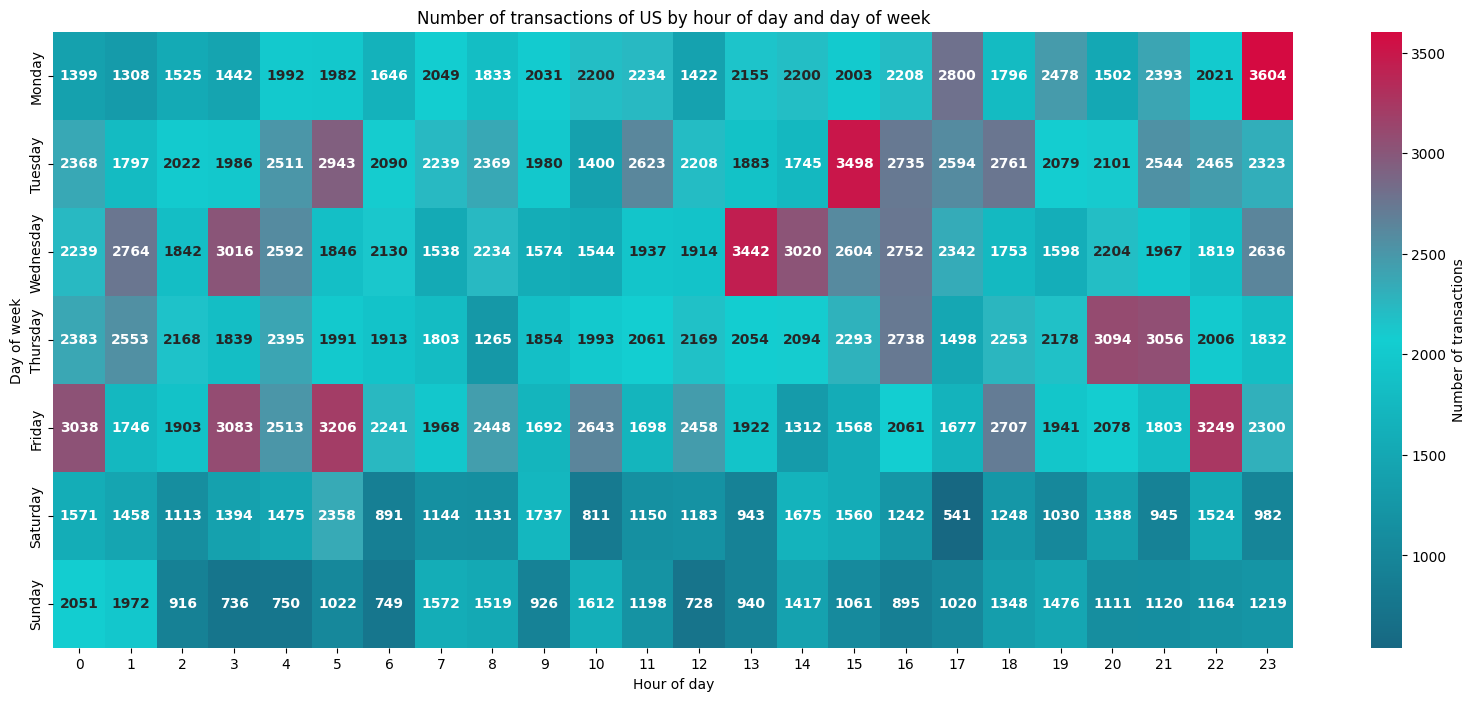

In [33]:
# Số lượng giao dịch theo giờ trong ngày và ngày trong tuần
# Tạo pivot table cho heatmap
ct = 'US'
heatmap_data = local_comp_data[local_comp_data['country'] == ct].pivot_table(values='price_in_usd', index='local_day_of_week', columns='local_hour_session', aggfunc='count', fill_value=0)

# Sắp xếp lại thứ tự của ngày trong tuần để hiển thị đúng
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

def integer_formatter(x, pos):
    return f'{int(x)}'

# Chỉnh màu
colors = ['#176882', '#13CED1', '#D50A41']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='', cbar_kws={'label': 'Number of transactions'}, annot_kws={"size": 10, "weight": "bold"})

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(FuncFormatter(integer_formatter))

plt.title('Number of transactions of {} by hour of day and day of week'.format(ct))
plt.xlabel('Hour of day')
plt.ylabel('Day of week')

plt.show()

**Nhận xét:**
- Users mua hàng nhiều nhất vào:
  + Thứ hai(17h, 23h). 23h ngày thứ hai users thực hiện nhiều transaction nhất
  + Thứ ba(4-5h, 11h, 15-18h, 21h)
  + Thứ tư(1h, 3-4h, 13-16h, 23h)
  + Thứ năm(1h, 16h, 20-21h)
  + Thứ sáu(0h, 3-5h, 10h, 18h, 22h)

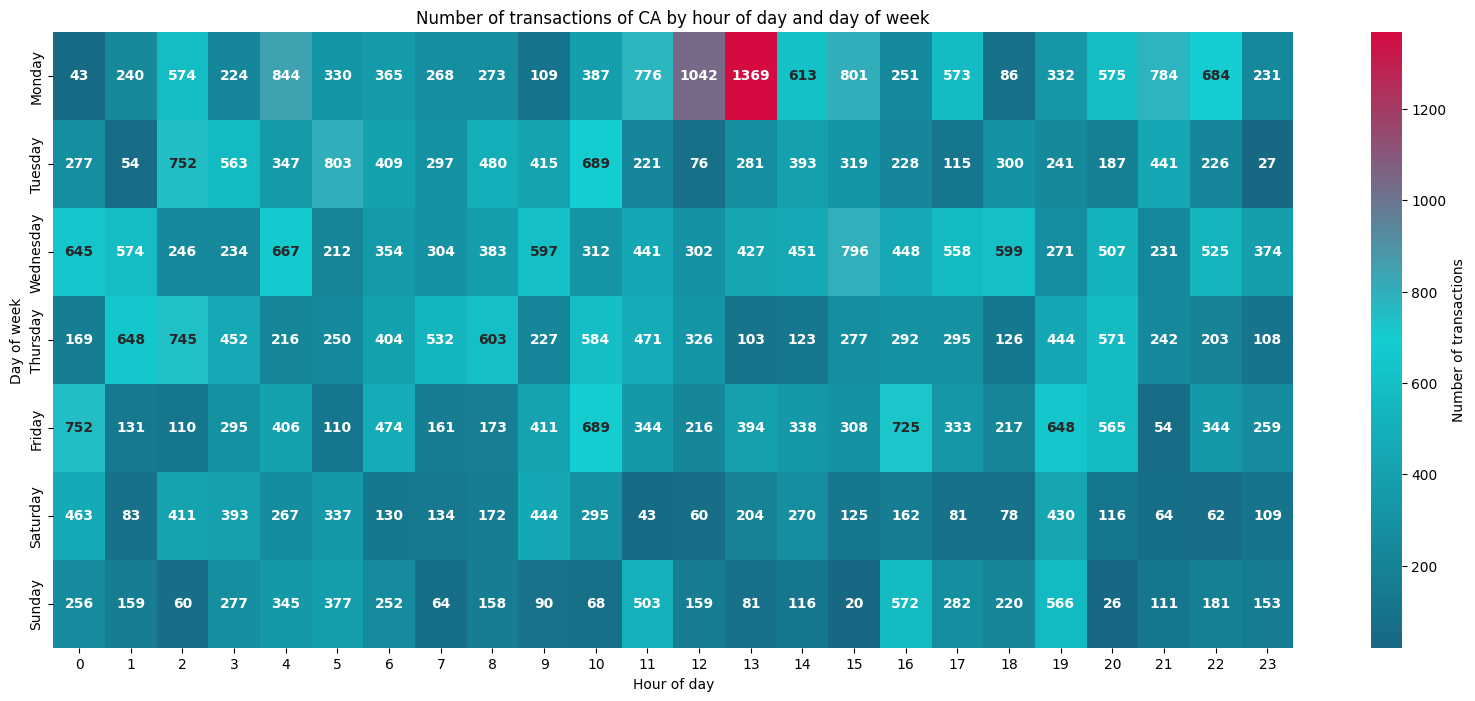

In [34]:
# Số lượng giao dịch theo giờ trong ngày và ngày trong tuần
# Tạo pivot table cho heatmap
ct = 'CA'
heatmap_data = local_comp_data[local_comp_data['country'] == ct].pivot_table(values='price_in_usd', index='local_day_of_week', columns='local_hour_session', aggfunc='count', fill_value=0)

# Sắp xếp lại thứ tự của ngày trong tuần để hiển thị đúng
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

def integer_formatter(x, pos):
    return f'{int(x)}'

# Chỉnh màu
colors = ['#176882', '#13CED1', '#D50A41']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='', cbar_kws={'label': 'Number of transactions'}, annot_kws={"size": 10, "weight": "bold"})

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(FuncFormatter(integer_formatter))

plt.title('Number of transactions of {} by hour of day and day of week'.format(ct))
plt.xlabel('Hour of day')
plt.ylabel('Day of week')

plt.show()

**Nhận xét:**
- Users mua hàng nhiều nhất vào thứ 2(12-13h)

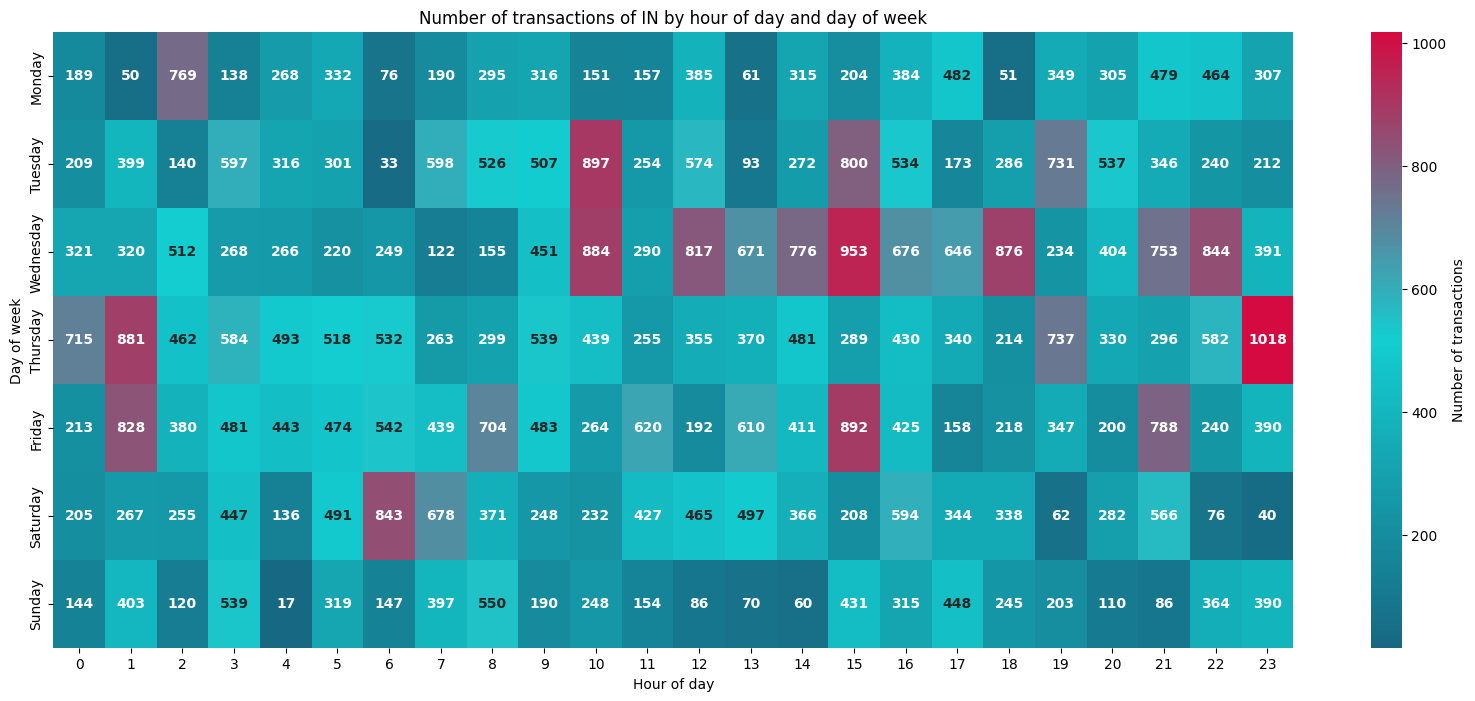

In [35]:
# Số lượng giao dịch theo giờ trong ngày và ngày trong tuần
# Tạo pivot table cho heatmap
ct = 'IN'
heatmap_data = local_comp_data[local_comp_data['country'] == ct].pivot_table(values='price_in_usd', index='local_day_of_week', columns='local_hour_session', aggfunc='count', fill_value=0)

# Sắp xếp lại thứ tự của ngày trong tuần để hiển thị đúng
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

def integer_formatter(x, pos):
    return f'{int(x)}'

# Chỉnh màu
colors = ['#176882', '#13CED1', '#D50A41']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='', cbar_kws={'label': 'Number of transactions'}, annot_kws={"size": 10, "weight": "bold"})

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(FuncFormatter(integer_formatter))

plt.title('Number of transactions of {} by hour of day and day of week'.format(ct))
plt.xlabel('Hour of day')
plt.ylabel('Day of week')

plt.show()

**Nhận xét:**
- Users mua hàng nhiều vào:
 + Thứ 2(2h)
 + Thứ 3(10h, 15h)
 + Thứ 4(10h, 12h, 14-15h, 18h, 21-22h)
 + Thứ 5(1h, 23h). Đạt lượng transaction cao nhất
 + Thứ 6(1h, 15, 21h)
 + Thứ 7(6h)

## Bước 4: Export data

In [36]:
#Export to CSV
# comp_data.to_csv('/content/drive/MyDrive/DA_course1/Final project/comp_data_test_cohort.csv', index=False)

In [37]:
# Export data to a Markdown file for use in NotebookLM
# with open("/content/drive/MyDrive/DA_course1/Final project/items_markdown.md", 'w') as md:
#   itm.to_markdown(buf=md, tablefmt="grid")

## Data country null

In [38]:
data_country_null = test[test['country'].isnull()]
data_country_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4291 entries, 16 to 758594
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           4291 non-null   int64 
 1   ga_session_id     4291 non-null   int64 
 2   country           0 non-null      object
 3   device            4291 non-null   object
 4   type              4291 non-null   object
 5   item_id           4291 non-null   int64 
 6   date_session      4291 non-null   object
 7   item_name         4291 non-null   object
 8   brand             4291 non-null   object
 9   variant           505 non-null    object
 10  category          4291 non-null   object
 11  price_in_usd      4291 non-null   int64 
 12  ltv               4291 non-null   int64 
 13  user_create_date  4291 non-null   object
dtypes: int64(5), object(9)
memory usage: 502.9+ KB


In [39]:
# sum GMV and % in total
sum_GMV_country_null = data_country_null[data_country_null['type'] == 'purchase']['price_in_usd'].sum()
sum_GMV_country_null
percentage_GMV_country_null = sum_GMV_country_null * 100 / test[test['type'] == 'purchase']['price_in_usd'].sum()
percentage_GMV_country_null
print('sum GMV {} and percentage in total {}'.format(sum_GMV_country_null, percentage_GMV_country_null))

sum GMV 1486 and percentage in total 0.5134637379192625


**Nhận xét:**
- GMV đóng góp vào doanh nghiệp chỉ có 0.5%. Cần tập trung vào phân tích bộ dữ liệu chứa đầy đủ thông tin. Bước tiếp theo sẽ tìm xem những khách hàng vip trong tập dữ liệu này xem họ có đóng góp đáng kể cho GMV hay không?

In [40]:
# vip user country null
vip_user_country_null = data_country_null[data_country_null['type'] == 'purchase'].groupby('user_id')['price_in_usd'].sum().reset_index()
vip_user_country_null = vip_user_country_null.rename(columns={'price_in_usd': 'GMV'})
vip_user_country_null = vip_user_country_null.sort_values(by='GMV', ascending=False).reset_index()
vip_user_country_null

,index,user_id,GMV
0,0,741,272
1,8,8573,163
2,11,11032,146
3,7,8363,111
4,10,9657,75
5,22,25317,70
6,24,25390,60
7,9,9216,56
8,2,7211,55
9,27,31485,37


**Nhận xét:**
- Có tổng cộng 29 users tạo ra GMV cho doanh nghiệp. Và có 4 users chi hơn 100USD để mua hàng. Ta có thể đưa các users này vào phân khúc chăm sóc khách hàng phù hợp sau khi phân tích đối với tập dữ liệu chứa đầy đủ các giá trị

## Data variant null

In [41]:
variant_null = test[test['variant'].isnull()]
variant_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635103 entries, 109492 to 758882
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           635103 non-null  int64 
 1   ga_session_id     635103 non-null  int64 
 2   country           631317 non-null  object
 3   device            635103 non-null  object
 4   type              635103 non-null  object
 5   item_id           635103 non-null  int64 
 6   date_session      635103 non-null  object
 7   item_name         635103 non-null  object
 8   brand             635103 non-null  object
 9   variant           0 non-null       object
 10  category          635103 non-null  object
 11  price_in_usd      635103 non-null  int64 
 12  ltv               635103 non-null  int64 
 13  user_create_date  635103 non-null  object
dtypes: int64(5), object(9)
memory usage: 72.7+ MB


In [42]:
# sum GMV and % in total
sum_GMV_variant_null = variant_null[variant_null['type'] == 'purchase']['price_in_usd'].sum()
percentage_GMV_variant_null = sum_GMV_variant_null * 100 / test[test['type'] == 'purchase']['price_in_usd'].sum()
print('sum GMV {} and percentage in total {}'.format(sum_GMV_variant_null, percentage_GMV_variant_null))

sum GMV 0 and percentage in total 0.0


In [43]:
variant_null[variant_null['type'] == 'begin_checkout'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           0 non-null      int64 
 1   ga_session_id     0 non-null      int64 
 2   country           0 non-null      object
 3   device            0 non-null      object
 4   type              0 non-null      object
 5   item_id           0 non-null      int64 
 6   date_session      0 non-null      object
 7   item_name         0 non-null      object
 8   brand             0 non-null      object
 9   variant           0 non-null      object
 10  category          0 non-null      object
 11  price_in_usd      0 non-null      int64 
 12  ltv               0 non-null      int64 
 13  user_create_date  0 non-null      object
dtypes: int64(5), object(9)
memory usage: 0.0+ bytes


In [44]:
variant_null[variant_null['type'] == 'purchase'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           0 non-null      int64 
 1   ga_session_id     0 non-null      int64 
 2   country           0 non-null      object
 3   device            0 non-null      object
 4   type              0 non-null      object
 5   item_id           0 non-null      int64 
 6   date_session      0 non-null      object
 7   item_name         0 non-null      object
 8   brand             0 non-null      object
 9   variant           0 non-null      object
 10  category          0 non-null      object
 11  price_in_usd      0 non-null      int64 
 12  ltv               0 non-null      int64 
 13  user_create_date  0 non-null      object
dtypes: int64(5), object(9)
memory usage: 0.0+ bytes


**Nhận xét:**
- Các records có giá trị variant là null thì đều có type là "add_to_cart". Đồng nghĩa với việc không tạo ta GMV cho doanh nghiệp
- Loại bỏ các rows chứa giá trị variant là null. Chỉ tập trung vào tập dữ liệu có chứa giá trị variant

##Summarize dashboard to text

In [ ]:
!pip install openai pillow
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=26b8d275b0ba4f738697f43aff80439cf8f0fba67920ac41a40c8aba0d177b0c
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:
import base64
import requests
from fpdf import FPDF

# OpenAI API Key
api_key = "YOUR_API_KEY"

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "/content/drive/MyDrive/DA_course1/Final project/Dashboard 1.png"

# Getting the base64 string
base64_image = encode_image(image_path)

# Headers and payload for OpenAI API request
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-mini",
    "messages": [
        {
            "role": "user",
            "content": "Summarize this dashboard."
        }
    ],
    "functions": [
        {
            "name": "summarize_dashboard",
            "arguments": [
                {
                    "type": "image_url",
                    "value": f"data:image/png;base64,{base64_image}"
                }
            ]
        }
    ],
    "max_tokens": 300
}

# Sending the request to OpenAI API
response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

# Parsing the API response
response_data = response.json()
summary = response_data.get("choices", [{}])[0].get("message", {}).get("content", "No summary available.")

# Saving the summary into a PDF file
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, summary)

# Save PDF to file
output_path = "/content/drive/MyDrive/DA_course1/dashboard_summary.pdf"
pdf.output(output_path)
